<a href="https://colab.research.google.com/github/ReetDubey/Google-Colab/blob/master/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Support Vector Machine Code**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading data from csv file

In [ ]:
cell_df=pd.read_csv("/content/drive/My Drive/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
cell_df.shape

(699, 11)

In [ ]:
cell_df.size

7689

In [ ]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [ ]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Distribution of the classes

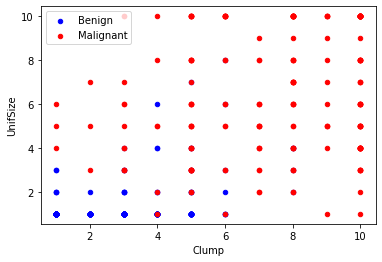

In [ ]:
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==4][0:200]
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)
#help(benign_df.plot)

Identifying unwanted rows

In [ ]:
cell_df.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Remove Unwanted Columns

In [ ]:
cell_df.columns

feature_df=cell_df[{'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'}]
x = np.asarray(feature_df)
y = np.asarray(cell_df['Class'])
x[0:5]

array([[ 1,  1,  2,  1,  3,  1,  5,  1,  1],
       [ 5,  4,  7, 10,  3,  1,  5,  4,  2],
       [ 1,  1,  2,  2,  3,  1,  3,  1,  1],
       [ 1,  8,  3,  4,  3,  1,  6,  8,  7],
       [ 3,  1,  2,  1,  3,  1,  4,  1,  1]])

Divide the data as train/test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=4)

x_train.shape

(137,)

In [ ]:
y_train.shape

(546,)

In [ ]:
x_test.shape

(137, 9)

In [ ]:
y_test.shape

(137,)

Modeling (svm with scikit-learn)

In [ ]:
from sklearn import svm
classifier= svm.SVC(kernel='linear', gamma='auto', C=2)

classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)


Evaluation

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

